# Jeu de données provenant de Kaggle : Contradictory, My Dear Watson

# 85% d'accuracy !

In [1]:
#AllenNLP Library
!pip install  -U allennlp_models 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 9.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:0000:01
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=a9a49c525f98194e5c67ffb55e4a2783655c6e410b6fd91f947ad958fbf047a4
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: protobuf
    Found 

In [54]:
!pip install pretty-confusion-matrix
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: tomli
    Found existing installation: tomli 2.0.1
    Uninstalling tomli-2.0.1:
      Successfully uninstalled tomli-2.0.1
  Attempting uninstall: pyflakes
   

In [55]:
from allennlp_models.pretrained import load_predictor
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, balanced_accuracy_score \
                            ,matthews_corrcoef, average_precision_score, precision_recall_curve, auc, plot_precision_recall_curve
from pretty_confusion_matrix import pp_matrix_from_data
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [59]:
#Model
model = load_predictor("pair-classification-roberta-snli")

#Exemple 
premise = "Two women are wandering along the shore drinking iced tea."
hypothesis = "Two women are sitting on a blanket near some rocks talking about politics."
preds = model.predict(premise,hypothesis)

Dataset for testing 

In [61]:
df_train=pd.read_csv("/kaggle/input/contradictory-my-dear-watson/train.csv", sep=",")
df_dev=pd.read_csv("/kaggle/input/contradictory-my-dear-watson/sample_submission.csv", sep=",")
df_test=pd.read_csv("/kaggle/input/contradictory-my-dear-watson/test.csv", sep=",")

In [62]:
df_train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


# Garder que l'anglais

In [64]:
#Garder que l'anglais
df_train=df_train[df_train["language"]=="English"]
df_dev=df_train[df_train["language"]=="English"]
df_test=df_train[df_train["language"]=="English"]
#Garder que les columns dont on a besoin
df_train.drop(columns = ['id', 'lang_abv','language'],axis = 1, inplace = True)
df_dev.drop(columns = ['id', 'lang_abv','language'],axis = 1, inplace = True)
df_test.drop(columns = ['id', 'lang_abv','language'],axis = 1, inplace = True)

#On renomme
df_train.rename(columns = {'premise':'sentence1', 'hypothesis':'sentence2','goldlabel':'gold_label'}, inplace = True)
df_dev.rename(columns = {'premise':'sentence1', 'hypothesis':'sentence2','goldlabel':'gold_label'}, inplace = True)
df_test.rename(columns = {'premise':'sentence1', 'hypothesis':'sentence2','goldlabel':'gold_label'}, inplace = True)


KeyError: 'language'

In [65]:
df_train.head()

,sentence1,sentence2,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0
7,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,2
8,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,1


In [66]:
df_train.groupby('label').count()

,sentence1,sentence2
label,,
0,2427,2427
1,2166,2166
2,2277,2277


In [67]:
# removing the entries from all train, dev and test datasets with label '-'
df_train = df_train[df_train['label'] != '-']
df_dev = df_dev[df_dev['label'] != '-']
df_test = df_test[df_test1['label'] != '-']

df_test = df_test.head(200)   # dropping the rows from the data with NaN values
df_train = df_train.dropna(subset = ['sentence2'])
df_train.groupby('label').count() 

,sentence1,sentence2
label,,
0,2427,2427
1,2166,2166
2,2277,2277


In [145]:
label_mapping = ['contradiction', 'neutral', 'entailment']

In [146]:
premise  = df_test['sentence1'].values
hypothesis = df_test['sentence2'].values

# predictions pour le jeu de test 
listt = []
for i in range (len(hypothesis)):
  preds = model.predict(premise[i],hypothesis[i])
  labels = [label_mapping[score_max] for score_max in np.array([preds['logits']], dtype="float32").argmax(axis=1)]
  # listt.append(preds['probs'])
  listt.append(labels)

In [147]:
le = LabelEncoder()
Y_test = np_utils.to_categorical(le.fit_transform(df_test["label"].values)).astype("int64")

In [149]:
Y_predi = np_utils.to_categorical(le.fit_transform(listt)).astype("int64")

In [150]:
test_acc = (np.argmax(Y_predi, axis=1) == np.argmax(Y_test, axis=1)).sum()/Y_test.shape[0] * 100
print("Accuracy on test set is: %"+str(test_acc)) 

Accuracy on test set is: %85.0


In [151]:
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1),(np.argmax(Y_predi, axis=1)))

In [153]:
Y_test = np.argmax(Y_test, axis=1)
Y_predi = np.argmax(Y_predi, axis=1)

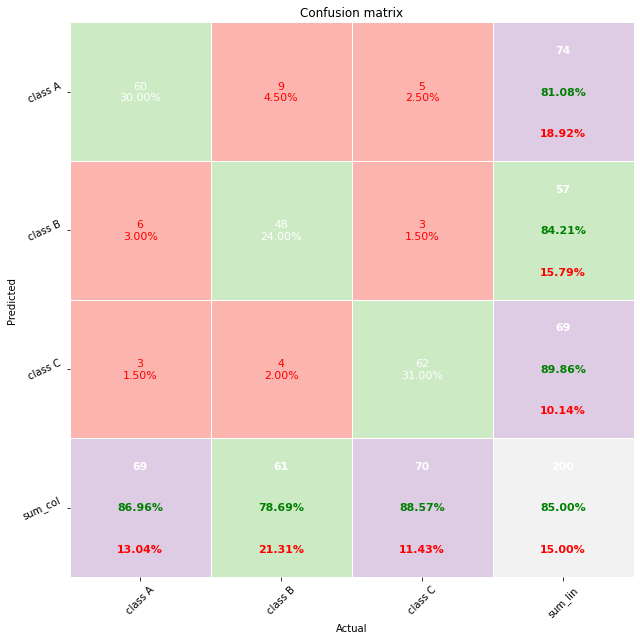

In [154]:
pp_matrix_from_data(Y_test, Y_predi, cmap='Pastel1')